### Análise de uma base de dados de Vendas
GMV é uma sigla em inglês para Gross Merchandise Volume, que significa Volume Bruto de Mercadoria. Aqui, foi considerado como valor total das vendas.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import sklearn
import plotly

In [3]:
db = pd.read_excel("db_vendas_m.xlsx",header=1,na_values='#DIV/0!')
db.head()

,Nº de vendas,Nº de vendas confirmadas,Qtd de acessos,Data,GMV,Tipo,Categoria,Parceiro,Taxa de Conversão,Taxa de Confirmação
0,7,7,91,2022-01-01,2776.28,Padrão,MODA E ACESSÓRIOS,Parceiro-1335,0.076923,1.0
1,4,2,35,2022-01-01,7842.22,Padrão,VIAGEM E TURISMO,Parceiro-1561,0.057143,0.5
2,2,1,16,2022-01-01,1599.00,Padrão,MODA E ACESSÓRIOS,Parceiro-169,0.062500,0.5
3,10,9,56,2022-01-01,4783.39,Padrão,MODA E ACESSÓRIOS,Parceiro-1785,0.160714,0.9
4,3,3,45,2022-01-01,6491.66,Padrão,LOJA DE DEPARTAMENTOS,Parceiro-1963,0.066667,1.0


### Conhecendo os dados

In [4]:
print('-------NULL VALUES PER FEATURE --------')
print(db.isna().sum())


-------NULL VALUES PER FEATURE --------
Nº de vendas                 0
Nº de vendas confirmadas     0
Qtd de acessos               0
Data                         0
GMV                          0
Tipo                         0
Categoria                    0
Parceiro                     0
Taxa de Conversão            0
Taxa de Confirmação         66
dtype: int64


In [5]:
unicos = db['Categoria'].unique()
categorias=unicos.astype(str)
categorias

array(['MODA E ACESSÓRIOS', 'VIAGEM E TURISMO', 'LOJA DE DEPARTAMENTOS',
       'MÓVEIS, CASA E DECORAÇÃO', 'BELEZA E SAÚDE', 'ESPORTE E LAZER',
       'ALIMENTOS E BEBIDAS'], dtype='<U24')

In [6]:
print(db.nunique())

Nº de vendas                 859
Nº de vendas confirmadas     800
Qtd de acessos              1557
Data                         135
GMV                         2699
Tipo                           2
Categoria                      7
Parceiro                      21
Taxa de Conversão           2235
Taxa de Confirmação         1314
dtype: int64


In [8]:
database.loc[database['Nº de vendas']==0,'Parceiro'].value_counts()

Parceiro-7749    40
Parceiro-1785    15
Parceiro-8152     9
Parceiro-169      2
Name: Parceiro, dtype: int64

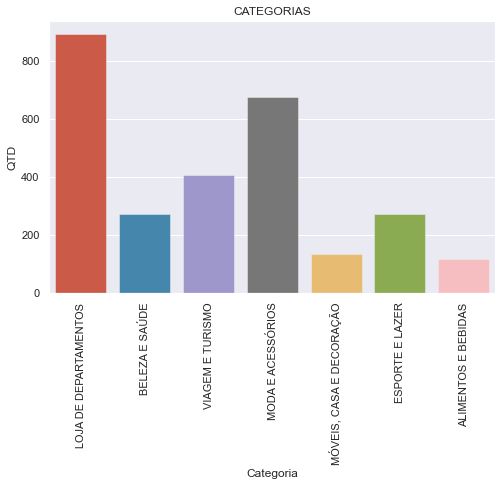

In [9]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(8,5)})
plt.xticks(rotation=90)
plt.title('CATEGORIAS')
plt.style.use('ggplot')
ax=sns.countplot(x='Categoria', data=database);
ax.set(ylabel='QTD')

plt.show()

In [10]:
database['Parceiro'].value_counts()

Parceiro-233     135
Parceiro-220     135
Parceiro-1561    135
Parceiro-1785    135
Parceiro-1963    135
Parceiro-62      135
Parceiro-6539    135
Parceiro-525     135
Parceiro-395     135
Parceiro-51      135
Parceiro-6095    135
Parceiro-1335    135
Parceiro-82      135
Parceiro-2171    135
Parceiro-49      135
Parceiro-262     135
Parceiro-463     135
Parceiro-2       135
Parceiro-169     135
Parceiro-7749    116
Parceiro-8152     83
Name: Parceiro, dtype: int64

In [11]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1302 to 511
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Nº de vendas              2764 non-null   int64         
 1   Nº de vendas confirmadas  2764 non-null   int64         
 2   Qtd de acessos            2764 non-null   int64         
 3   Data                      2764 non-null   datetime64[ns]
 4   GMV                       2764 non-null   float64       
 5   Tipo                      2764 non-null   object        
 6   Categoria                 2764 non-null   object        
 7   Parceiro                  2764 non-null   object        
 8   Taxa de Conversão         2764 non-null   float64       
 9   Taxa de Confirmação       2698 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 237.5+ KB


#### Adicionando uma coluna com o mês

In [12]:
database['Mês'] = pd.to_datetime(database['Data']).dt.month
database.head()

,Nº de vendas,Nº de vendas confirmadas,Qtd de acessos,Data,GMV,Tipo,Categoria,Parceiro,Taxa de Conversão,Taxa de Confirmação,Mês
1302,14438,13232,64608,2022-03-07,3049979.51,Padrão,LOJA DE DEPARTAMENTOS,Parceiro-233,0.204804,0.916470,3
125,13709,12287,116919,2022-01-07,15545125.34,Promocional,LOJA DE DEPARTAMENTOS,Parceiro-220,0.105090,0.896273,1
2646,13254,12320,63073,2022-05-10,4279299.26,Promocional,LOJA DE DEPARTAMENTOS,Parceiro-233,0.195329,0.929531,5
123,12328,10951,87883,2022-01-07,13093126.61,Promocional,LOJA DE DEPARTAMENTOS,Parceiro-2,0.124609,0.888303,1
1407,12128,10978,61103,2022-03-12,4170689.03,Promocional,LOJA DE DEPARTAMENTOS,Parceiro-233,0.179664,0.905178,3


In [13]:
database.filter(items=['Parceiro','Categoria','Nº de vendas confirmadas','Nº de vendas'])\
                  .groupby(['Categoria']).sum()

,Nº de vendas confirmadas,Nº de vendas
Categoria,,
ALIMENTOS E BEBIDAS,157,633
BELEZA E SAÚDE,89516,115111
ESPORTE E LAZER,8083,9924
LOJA DE DEPARTAMENTOS,1175072,1324020
MODA E ACESSÓRIOS,45190,49113
"MÓVEIS, CASA E DECORAÇÃO",6676,7354
VIAGEM E TURISMO,56135,82538


### Skill hunter

#### Analisando a quantidade de vendas

Desafio: Dado um DataFrame com informações de vendas, calcule o valor total de vendas por mês e crie um gráfico de barras para visualizar os resultados.

In [14]:
vendas_por_mes = database.groupby('Mês')['GMV'].sum()
vendas_por_mes

Mês
1    1.946758e+08
2    1.820910e+08
3    2.151501e+08
4    1.496285e+08
5    9.214652e+07
Name: GMV, dtype: float64

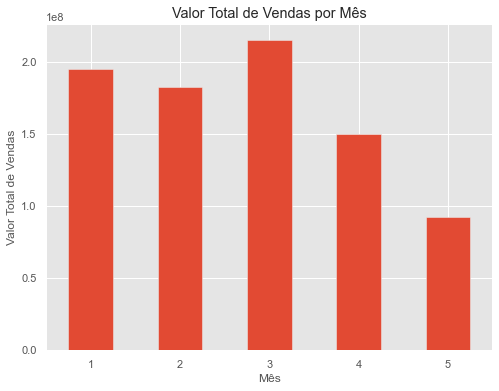

In [17]:
# Plotando em um gráfico de barras
vendas_por_mes.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês')
plt.xticks(rotation=0)
plt.show()

### Total de vendas por parceiro em cada categoria

In [18]:
database.filter(items=['Parceiro', 'Nº de vendas confirmadas', 'Nº de vendas', 'Data','Categoria'])

,Parceiro,Nº de vendas confirmadas,Nº de vendas,Data,Categoria
1302,Parceiro-233,13232,14438,2022-03-07,LOJA DE DEPARTAMENTOS
125,Parceiro-220,12287,13709,2022-01-07,LOJA DE DEPARTAMENTOS
2646,Parceiro-233,12320,13254,2022-05-10,LOJA DE DEPARTAMENTOS
123,Parceiro-2,10951,12328,2022-01-07,LOJA DE DEPARTAMENTOS
1407,Parceiro-233,10978,12128,2022-03-12,LOJA DE DEPARTAMENTOS
...,...,...,...,...,...
451,Parceiro-7749,0,0,2022-01-23,ALIMENTOS E BEBIDAS
471,Parceiro-7749,0,0,2022-01-24,ALIMENTOS E BEBIDAS
491,Parceiro-7749,0,0,2022-01-25,ALIMENTOS E BEBIDAS
610,Parceiro-169,0,0,2022-02-01,MODA E ACESSÓRIOS


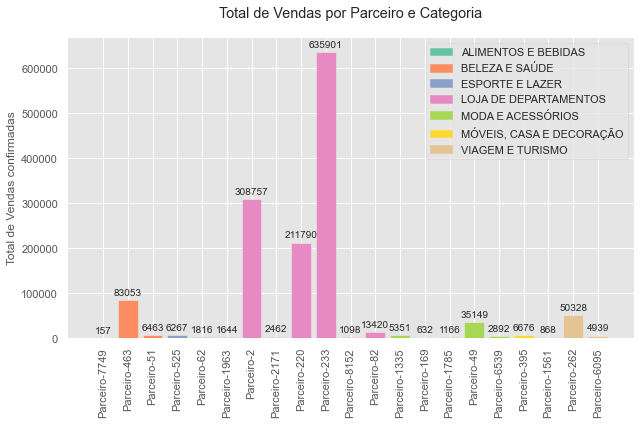

In [22]:
# Agrupando as vendas por parceiro e obtendo a soma total de vendas
vendas_por_parceiro = database.groupby('Parceiro')['Nº de vendas confirmadas'].sum()
#unicas
categorias_unicas = np.unique(categorias)
# Obtendo a categoria de cada parceiro
categorias_por_parceiro = database.groupby('Parceiro')['Categoria'].first()

# Configurando o gráfico de barras
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 6))

# Definindo as cores das barras com base nas categorias
# Definir o número de cores desejado
num_cores = len(categorias_unicas)

# Utilizar um esquema de cores predefinido
cores = sns.color_palette("Set2", num_cores)


for i, categoria in enumerate(categorias_unicas):
    vendas_categoria = vendas_por_parceiro[categorias_por_parceiro == categoria]
    ax.bar(vendas_categoria.index, vendas_categoria.values, color=cores[i])

# Configurando os rótulos e o título do gráfico
plt.ylabel('Total de Vendas confirmadas')
plt.title('Total de Vendas por Parceiro e Categoria', pad=20)
plt.xticks(rotation=90)
# Adicionando os valores acima de cada barra com o espaçamento adequado
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', label_type='edge', padding=3)

# Reposicionando a legenda no canto superior direito
legendas = [plt.Rectangle((2, 1), 1,1 , color=cor) for cor in cores[:len(categorias_unicas)]]
ax.legend(legendas, categorias_unicas)


# Exibindo o gráfico
plt.tight_layout()
plt.savefig('totalvendasporParceiro.png', format='png',bbox_inches="tight")
plt.show()
